**Problema** 2-5

La siguiente tabla agrupa los valores de actividad del Ni en una aleación Fe–Ni líquida, a T = $1873$ K, en función de la composición:

\begin{array}{|c|c|c|}
\hline
x_{Ni}&0,1&0,2&0,3&0,4&0,5&0,6&0,7&0,8&0,9&1\\
\hline
a_{Ni}&0,067&0,136&0,207&0,283&0,374&0,485&0,620&0,766&0,890&1\\
\hline
\end{array}

a) Determine la variación de la actividad del hierro, $a_{Fe}$, con la composición, usando la ecuación de Gibbs Duhem.

b) Haga un gráfico de $\ln \varphi_{Ni}^{R}$ y $\ln \varphi_{Ni}^{R}$ vs. $x_{Ni}$.

**Resolución:**

**a)** Se trata de un ejercicio típico en el que nos piden relacionar el coeficiente de actividad (notado con $\varphi$) de un componente en función de la composición, dándonos como dato la dependencia con la composición del coeficiente de actividad del otro componente. Llamaremos $1$ al $Ni$ y $2$ al $Fe$.

Nuestra herramienta de cabecera en este tipo de ejercicios será siempre la ecuación de Gibbs-Duhem (GD). Para una mezcla binaria, la ecuación de GD establece que:

$$ x_{1}d\mu_{1} + x_{2}d\mu_{2}=0 $$

Antes de seguir, notemos que los datos de la tabla están en la escala de Raoult, pues la actividad es unitaria para $x_{Ni}=1$. Si escribimos el potencial químico de cada especie utilizando esta escala:

$$ \mu_{1} = \mu_{1}^{*}+RT \ln a_{1}^{R} $$

$$ \mu_{2} = \mu_{2}^{*}+RT \ln a_{2}^{R} $$

A partir de acá omitiremos el superíndice $R$ en las actividades.

Reemplazando en GD y dividiendo a ambos lados por $d x_{2}$ se obtiene:

$$ \frac{d \ln a_{2}}{d x_{2}} = -\frac{x_{1}}{x_{2}} \frac{d\ln a_{1}}{d x_{2}}$$

**Lo que queremos es $a_{2}$ en función de $x_{2}$**, y tenemos la relación entre las derivada de $\ln{a_{2}}$ y $\ln a_{1}$  respecto de $x_{2}$ .

Como tenemos datos de $\ln a_{1}$ en función de $x_{1}$, lo que haremos será calcular $x_{2}$ para cada valor de $x_{1}$, ajustar por un polinomio la función $\ln a_{1}(x_{2})$ y luego derivarla.

Comencemos por importar algunos bibliotecas:

In [ ]:
import numpy as np #para hacer cuentas y usar sus arrays, que son muy versátiles
import matplotlib.pyplot as plt #para graficar
from scipy.optimize import curve_fit #para hacer ajustes
from sklearn.metrics import r2_score #para computarle el R2 a los ajustes 

Ahora vamos a cargar nuestros datos en el código. Lo vamos a hacer a mano, pero normalmente si tuviéramos los datos en un archivo .txt o tabla de excel, usaríamos funciones como np.loadtxt o pandas.read_csv.

In [ ]:
x1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
a1=[0.067,0.136,0.207,0.283,0.374,0.485,0.620,0.766,0.890,1.0]
x1=np.array(x1)
x2=1-x1
lna1=np.log(a1)

Grafiquemos, para ver qué "pinta" tienen nuestros datos:

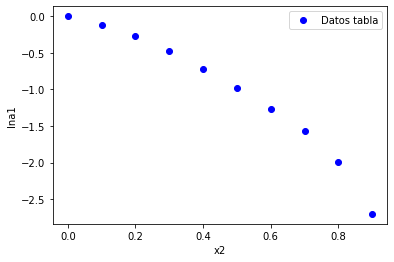

In [ ]:
plt.plot(x2,lna1,'bo', label="Datos tabla") # el argumento 'bo' hace que se ploteen los puntos en lugar de la linea que los une
plt.xlabel('x2') #Rótulo de eje horizontal
plt.ylabel('lna1') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

Ahora definimos nuestras funciones de ajuste. Cabe destacar que como buscamos ajustar por polinomios, podríamos haber utilizado la función np.polyfit. Usaremos curvefit solo para mantener la transparencia del código.

La estrategia será la de ajustar con polinomios de distinto grado, y computar el valor de $R^2$ en cada caso para evaluar la calidad del ajuste. Notar que podemos hacer esto porque dada la forma funcional del gráfico anterior, ya de entrada sabemos que un polinomio va a funcionar... Sino, no alcanzaría con ver el $R^2$. Por último, observarán que los polinomios definidos a continuación no tienen término independiente. ¿Por qué les parece que esto es conveniente?

In [ ]:
 def pol2(x,a,b):  #defino una función para ajustar un polinomio de grado 2
  yfit = []
  for i in x:
    y=a*(i**2)+b*i
    yfit.append(y)
  return np.array(yfit)

def pol3(x,a,b,c):  #defino una función para ajustar un polinomio de grado 3
  yfit = []
  for i in x:
    y=a*(i**3)+b*(i**2)+c*i
    yfit.append(y)
  return np.array(yfit)

def pol4(x,a,b,c,d):  #defino una función para ajustar un polinomio de grado 4
  yfit = []
  for i in x:
    y=a*(i**4)+b*(i**3)+c*(i**2)+d*i
    yfit.append(y)
  return np.array(yfit)

def pol5(x,a,b,c,d,e):  #defino una función para ajustar un polinomio de grado 5
  yfit = []
  for i in x:
    y=a*(i**5)+b*(i**4)+c*(i**3)+d*(i**2)+e*i
    yfit.append(y)
  return np.array(yfit)

Llamamos a curve_fit y guardemos los parámetros del ajuste (coeficientes) optimizados y sus covarianzas asociadas:

In [ ]:
parampol2,paramcovarpol2 = curve_fit(pol2,x2, lna1) #la función curvefit devuelve dos cosas: una lista de parámetros y una de covarianzas
parampol3,paramcovarpol3 = curve_fit(pol3,x2, lna1) 
parampol4,paramcovarpol4 = curve_fit(pol4,x2, lna1) 
parampol5,paramcovarpol5 = curve_fit(pol5,x2, lna1) 

Imprimamos los parámetros de por ejemplo el ajuste por un polinomio de grado 2:

In [ ]:
print(parampol2)

[-2.34770556 -0.74533844]


Ahora guardaremos en arrays los valores de $\ln{a_{1}}$ predichos por cada ajuste:

In [ ]:
#pasarle a la función los parámetros de la forma (x1,parampol2[0],parampol2[1],parampol2[2]) es equivalente a escribir (x1,*parampol2)
lna1_pred_pol2=pol2(x2,*parampol2) 
lna1_pred_pol3=pol3(x2,*parampol3) 
lna1_pred_pol4=pol4(x2,*parampol4) 
lna1_pred_pol5=pol5(x2,*parampol5) 

Grafiquemos los ajustes junto con los datos experimentales (los de la tabla):

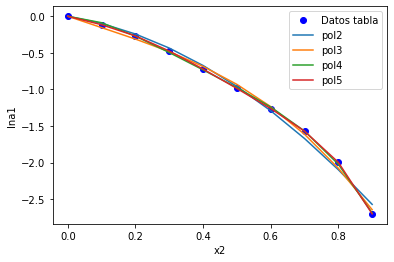

In [ ]:
plt.plot(x2,lna1,'bo', label="Datos tabla") 
plt.plot(x2,lna1_pred_pol2,label="pol2") 
plt.plot(x2,lna1_pred_pol3,label="pol3")
plt.plot(x2,lna1_pred_pol4,label="pol4") 
plt.plot(x2,lna1_pred_pol5,label="pol5")
plt.xlabel('x2')
plt.ylabel('lna1')
plt.legend()
plt.show()

Ya a ojo se ve que todos los ajustes funcioan bastante bien, con excepción del ajuste por un polinomio de grado 2, que a valores de $x_{2}$ cercanos a 1 parece no ajustar bien los datos.

Algo útil que podríamos hacer sería graficar de a uno los ajustes para ver con más claridad qué tan adecuados son. Sin embargo, aquí aprovecharemos para computar un métrica del ajuste, que es el $R^2$.

Esto lo haremos con una función **r2_score** de de **sklearn.metrics** (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html):

In [ ]:
#Guardaremos en un array los valores de r2
r2=[]
r2.append(r2_score(lna1, lna1_pred_pol2))
r2.append(r2_score(lna1, lna1_pred_pol3))
r2.append(r2_score(lna1, lna1_pred_pol4))
r2.append(r2_score(lna1, lna1_pred_pol5))
#Imprimamos los resultados
for i in range(0,len(r2)):
  print("Para el ajuste del pol de grado", i+2, "el r2 vale",r2[i])

Para el ajuste del pol de grado 2 el r2 vale 0.9936809548369613
Para el ajuste del pol de grado 3 el r2 vale 0.9970913021952552
Para el ajuste del pol de grado 4 el r2 vale 0.9996062863941059
Para el ajuste del pol de grado 5 el r2 vale 0.9999924304089189


Y esto es un poco arbitrario, pero nos quedaremos con el ajuste por el polinomio de grado 3, cuyos coeficientes son:

In [ ]:
print(parampol3)

[-2.40079886  0.67094593 -1.59853998]


De modo que trabajaremos con la siguiente expresión analítica de $\ln{a_{1}}$:

$$ \ln{a_{1}} = A x_{2}^{3} + B x_{2}^{2} + C x_{2} $$

Donde:

$$ A = -2,72 \quad B=1,19  \quad C=-1,85  \quad y \quad D=0,03$$

Luego,

$$ \frac{d\ln a_{1}}{d x_{2}} = 3 A x_{2}^{2} + 2 B x_{2} +C $$ 

Y reemplazando en la expresión del principio:

$$ \frac{d \ln a_{2}}{d x_{2}} = -\frac{x_{1}}{x_{2}} (3 A x_{2}^{2} + 2 B x_{2} +C) $$

Recordando que $x_{1}=1-x_{2}$ y haciendo distributiva:

$$ \frac{d \ln a_{2}}{d x_{2}} = (x_{2}-1)(3 A x_{2} + 2 B +\frac{C}{x_{2}}) $$


$$ \frac{d \ln a_{2}}{d x_{2}} = 3 A x_{2}^{2}  + 2 B x_{2} +C-3 A x_{2} - 2 B-\frac{C}{x_{2}} $$


$$ d \ln a_{2} = (3 A x_{2}^{2} + (2B -3A)x_{2} +(C-2 B) -\frac{C}{x_{2}} ) d x_{2}$$

E integrando la expresión anterior entre $x_{2} = 1$ y $x_{2}$:

$$ \int_{\ln a_{2}(x_{2}=1)}^{\ln a_{2}(x_{2})} d \ln a_{2} = \int_{1}^{x_{2}} (3 A x_{2}^{2} + (2B -3A)x_{2} +(C-2 B) -\frac{C}{x_{2}} ) d x_{2} $$

$$ \ln a_{2} - \ln (1) = \Bigg( A x_{2}^{3} + \frac{(2B -3A)}{2}x_{2}^{2} +(C-2 B)x_{2} -C \ln x_{2} \Bigg)\Bigg|_{1}^{x_{2}} $$


$$ \boxed{\ln a_{2} = A x_{2}^{3} + \frac{(2B -3A)}{2}x_{2}^{2} +(C-2 B)x_{2} -C \ln x_{2} + \frac{A}{2} + B - C}$$

Y finalmente, antes de seguir, generaremos una función que reciba una lista de $x_{2}$, los parámetros optimizados $A$, $B$ y $C$, y devuelva una lista de $\ln{a_{2}}$:

In [ ]:
def calc_lna2(x,A,B,C):  #defino una función para ajustar un polinomio de grado 3
  y = []
  for i in x:
    y.append(A*(i**3)+0.5*(2*B-3*A)*(i**2)+(C-2*B)*i-C*np.log(i)+0.5*A+B-C)
  return np.array(y)

**b)** Ahora nos piden graficar $\varphi_1$ y $\varphi_{2}$ en función de $x_1$.

Vamos a hacer esto para los valores de $x_{1}$ entre 0.01 y 0.99, para evitar dividir por cero en nuestra expresión analítica de $ln{a_2}$. Para ello generaremos los arrays x1new y x2new, y también un array con valores de $\varphi_1$ y otro con valores de $\varphi_{2}$:

In [ ]:
x1new=np.linspace(0.01,0.99,1000)
x2new=1-x1new
lna1new=pol3(x2new,*parampol3)
lna2new=calc_lna2(x2new,*parampol3)
lnphi1=lna1new-np.log(x1new)
lnphi2=lna2new-np.log(x2new)


Y ahora ploteamos:


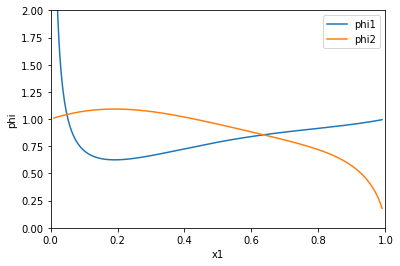

In [ ]:
plt.plot(x1new,np.exp(lnphi1),label="phi1")
plt.plot(x1new,np.exp(lnphi2),label="phi2") 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 2.0])

plt.xlabel('x1')
plt.ylabel('phi')
plt.legend()
plt.show()

¿Es el resultado esperado? ¿Qué comportamiento funcional esperaba? Intente en el siguiente recuadro repetir el análisis pero empleando esta vez el ajuste por un polinomio de grado 4.

In [ ]:
#Complete aquí



